<center>
<h2>Optimising Production Distribution from Multiple Sources</h2>
</H1>
</center>

<center>
<h2>Bouchra Er-rabbany </h2>
</H1>
</center>

In [3]:
import numpy as np
from timeit import default_timer as timer
from numpy import random as rd
from scipy.optimize import optimize

<center>
<h2>Approache 2 : working directly with multiple sources (mTSP)</h2>
</H1>
</center>

**Define Datasets**

In [51]:
#define set of manufactures with capacities
manifacture_q =np.array ([500,600,600,500,600])

In [52]:
sum_man = manifacture_q.sum();sum_man

2800

In [53]:
#define set of customer's needs 
customer_n = np.array ([80,90,20,70,90,30,50,60,70,80,90,60,110,120,100,80,120,130,80,100,90,50,90,100,90,80,60,100,120,90])

In [28]:
len(customer_n)

30

In [29]:
customer_n.sum()

2500

In [30]:
#manufactures capacities should satisfy customer's needs 
customer_n.sum()< manifacture_q.sum()

True

In [31]:
distance_mm = zero_matrix(5)

In [32]:
p, q = distance_mm.dimensions()

In [33]:
#generate random matrice with Zeros in diagonal
def gen_rand_mat(mat,isDiagZero = False):
    n,m = mat.dimensions()
    for i in range(n):
        for j in range(m):
            if isDiagZero :
                if i == j : 
                    continue
                mat[i,j] = randint(0,100)
            else:
                mat[i,j] = randint(0,100)
                            
    return mat

In [34]:
# define distance matrice between manufactures 
#modifier pour avoir la symetrie apres!!!!!
gen_rand_mat(distance_mm,isDiagZero=True)

[ 0  6 87 29 51]
[97  0 20 90 46]
[13 69  0 93 34]
[27 32 30  0  1]
[29 10 10  2  0]

In [35]:
distance_cc = zero_matrix(30)

In [36]:
distance_cc

30 x 30 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [37]:
#define distance matrice between cutomers 
gen_rand_mat(distance_cc,True) == distance_cc

True

In [38]:
show(gen_rand_mat(distance_cc))

30 x 30 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [40]:
distance_cm = matrix(30,5)

In [41]:
# define distance matrice between manufactures and customers
show(gen_rand_mat(distance_cm))

30 x 5 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [42]:
distance_mc = distance_cm.transpose()

In [43]:
show(distance_mc)

[24 88 66 39 72 99 31 95  3 34 73 30 39 38 44 21 73 63 92 40 75 81 85 22 71 17 12 46 39 15]
[94 64 80  3 36  5 55 91 61 87 79 23 30 18 89 40 70 93 84  5  9 31 56 83 88 83 66 15 26 66]
[ 5 57 13 69 16 16 69 54 47 71 85 32 89 65 44 69 95 94 46 58 21 68 93 32 53 67 12 76 66 34]
[45 20 93 43 75 61 64 76  5 10 57 68  4 10 46 68 42 39 93 14 33 45 16  3 46 66 59 88 95 89]
[96 13  4 30 88  1 46 27 97 16  7 78 28 97 94  6 91 30 63 91 29 10 32 68 60 24  4 69 50 83]

In [44]:
distance_mc.dimensions()

(5, 30)

In [45]:
#return the minimum of list wich is not 0 and its index 
def my_argmin(t, indexes=[]):
    min_elm = 10000000
    index = -1
    for i in range(len(t)) :
        if i not in indexes:
            if t[i] < min_elm and t[i] != 0:
                min_elm =t[i]
                index =i 
    return index,min_elm

In [46]:
#return the mqximum of list wich is not 0 and its index 
def my_argmax(t, indexes=[]):
    max_elm = 0
    index = -1
    for i in range(len(t)) :
        if i not in indexes:
            if t[i] > max_elm and t[i] != 0:
                max_elm =t[i]
                index =i 
    return index,max_elm

In [47]:
#input list of customers and list of Manufactures 
#Output sequence of manufactures and customers orders in such a way that we minimize the total distance(cycle with total distance minimum )
def pick_up_delivery2():
    vect_distance =[]
    for i in range(len(manifacture_q)):
        Total_distance = 0 #total distance is initialized by 0
        current_mani_index = i # the starting position is in the mabufacture depot
        current_quantity = manifacture_q[current_mani_index]
        isInClient = False
        hist_trajet = [-current_mani_index]
        client_indexes = []
        mani_indexes = [current_mani_index]
        t = len(customer_n) + len(manifacture_q)-1
        for k in range(t):
           
            if(isInClient): #if the trucks is in customer
                man_id ,d_cli_man = my_argmin(distance_cm[client_id], mani_indexes)
                cli_id, d_cli_cli  = my_argmin(distance_cc[client_id],client_indexes)

                if d_cli_man  > d_cli_cli and current_quantity >= customer_n[cli_id]:
                    client_id =cli_id
                    current_quantity -= customer_n[client_id]
                    hist_trajet.append(client_id)
                    isInClient = True
                    client_indexes.append(client_id)
                    Total_distance +=d_cli_cli
            

                else : 
                    current_quantity += manifacture_q[man_id]
                    hist_trajet.append(-man_id)  #to make difference between manufactures and customer, manufactures are negatives 
                    isInClient = False
                    mani_indexes.append(man_id)
                    current_mani_index = man_id
                    Total_distance +=d_cli_man 
                
            
            else : # if the trucks is in manufacture 
                client_id, d_cli_man = my_argmin(distance_mc[current_mani_index],client_indexes)
                man_id ,d_man_man = my_argmin(distance_mm[current_mani_index], mani_indexes)
                if d_man_man > d_cli_man  and current_quantity >= customer_n[client_id]:
                    current_quantity -= customer_n[client_id]
                    hist_trajet.append(client_id)
                    isInClient = True
                    client_indexes.append(client_id)
                    Total_distance +=d_cli_man
                  
                else:
                    current_quantity += manifacture_q[man_id]
                    hist_trajet.append(-man_id)
                    isInClient = False
                    mani_indexes.append(man_id)
                    current_mani_index = man_id
                    Total_distance +=d_man_man
                  
        
        if(isInClient):  #come back to the initial depot 
            Total_distance +=distance_cm[client_id][i]
            hist_trajet.append(i)
        else:
            Total_distance +=distance_mm[man_id][i]
            hist_trajet.append(i)
        vect_distance.append(Total_distance)
        print(hist_trajet,'the total distance is',Total_distance)
        
        
        
    print('the minimum distance is ',min(vect_distance))


In [48]:
%time(pick_up_delivery2())

([0, 8, 3, -1, 5, -4, -3, 23, 7, 21, 6, 28, 9, 16, 12, 0, -2, 26, 11, 14, 25, 20, 2, 19, 17, 13, 24, 22, 15, 29, 4, 1, 10, 18, 27, 0], 'the total distance is', 458)
([-1, 3, 0, -2, 26, 11, 14, 25, 9, -3, -4, 5, 1, 23, 7, 21, 6, 28, 8, 0, 29, 22, 15, 19, 17, 12, 2, 13, 24, 20, 18, 27, 16, 4, 10, 1], 'the total distance is', 467)
([-2, 0, 17, 14, 25, 26, 11, -1, 3, 27, 29, 28, 8, 0, 15, 19, 4, 12, -3, -4, 5, 9, 16, 10, 1, 23, 7, 21, 6, 2, 13, 24, 22, 20, 18, 2], 'the total distance is', 332)
([-3, -4, 5, 9, 16, 28, 8, 0, -1, 3, 0, -2, 26, 11, 14, 25, 6, 23, 7, 21, 13, 24, 2, 19, 17, 12, 27, 29, 22, 15, 10, 1, 20, 18, 4, 3], 'the total distance is', 437)
([-4, 5, 9, -3, 23, 7, 21, 6, 28, 8, 0, -1, 3, 0, -2, 26, 11, 14, 25, 20, 2, 19, 17, 12, 27, 29, 22, 15, 10, 1, 13, 24, 4, 18, 16, 4], 'the total distance is', 426)
('the minimum distance is ', 332)
CPU times: user 10.5 ms, sys: 6.4 ms, total: 16.9 ms
Wall time: 49.8 ms


<center>
<h2>Approache 1 : Transform multiple sources to single source </h2>
</H1>
</center>

<center>
<h2>Clustering </h2>
</H1>
</center>

**Naive Algorithm**

In [55]:
#input set of manufactures with there capacities and a set of customers with there needs 
# output set of clusters each cluster contains one manufacture with customers neighbors 
def Clustering(manufacture=[],customer=[]):
    client_indexes =[]
    clusters = []
    for i in range(len(manufacture)):
        Manufac_cap = manufacture[i]
        cluster_list = [i]
        for j in range(len(customer)): 
            if Manufac_cap>0:
                client_id, d_man_cli = my_argmin(distance_mc[i],client_indexes)
                if Manufac_cap > customer[client_id]:
                    cluster_list.append(client_id)
                    Manufac_cap=Manufac_cap-customer[client_id]
                    client_indexes.append(client_id)  
        clusters.append(cluster_list)  
    return clusters

In [56]:
clusters1 = Clustering(manifacture_q,customer_n);clusters1

[[0, 8, 26, 29, 25, 15, 23],
 [1, 3, 5, 19, 20, 27, 13, 11],
 [2, 0, 2, 4, 14, 18, 24, 7],
 [3, 12, 9, 22, 1],
 [4, 10, 21, 17, 6, 28, 16]]

**Devolopped Clustering Method**

**Connectedness Matrice**

In [107]:
Matrice =matrix([[1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1],
                 [0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1],
                 [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1],
                 [0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],
                 [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1],
                 [1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],

              
                 
                ]);Matrice

35 x 35 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [63]:
new_customer_n  = sorted(customer_n )

In [64]:
new_customer_n

[20,
 30,
 50,
 50,
 60,
 60,
 60,
 70,
 70,
 80,
 80,
 80,
 80,
 80,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 100,
 100,
 100,
 100,
 110,
 120,
 120,
 120,
 130]

In [65]:
#initialise dictionary of clusters 
def init_clusters():
    clusters = {}
    for k in range(len(manifacture_q)):
        clusters[k] = []
    return clusters

In [66]:
def Clustering_2(manufacture=[],customer=[]):
    client_indexes =[]
    manufactures_indexes = []
    man_cap = {}
    clusters = init_clusters()
    for i in range(len(customer)): 
        man_id, d_cli_man = my_argmin(distance_cm[i],client_indexes)
        Manufac_cap = manufacture[man_id]
        if Manufac_cap > customer[i] and Matrice[i+len(manufacture)][man_id]==1 :
            clusters[man_id] += [i]
            manufacture[man_id]=Manufac_cap-customer[i]
        else :
            insert_costumer(i,man_id,clusters,manufacture)
    for i in range(5):
        man_cap[i] = manufacture[i]
        
    return clusters  , man_cap             

In [67]:
def insert_costumer(i,man_id,clusters,manufacture):
    man_indexes = [man_id]
    mani_id, d_man_man = my_argmin(distance_cm[i],man_indexes)
    need_costumer = new_customer_n[i]
    cap_man = manifacture_q[mani_id]
    
    while cap_man < need_costumer or Matrice[i+len(manufacture)][man_id]==0 :
        print('cap man', cap_man,'need costumer', need_costumer)
        man_indexes.append(mani_id)
        mani_id, d_man_man = my_argmin(distance_cm[i],man_indexes)
        cap_man = manifacture_q[mani_id]
        
        
    manifacture_q[mani_id] -= need_costumer
    clusters[mani_id] += [i]

In [84]:
clusters2 = Clustering(manifacture_q,new_customer_n);clusters2

[[0, 8, 26, 29, 25],
 [1, 3, 5, 19, 20, 27, 13, 11],
 [2, 0, 2, 4, 23, 14, 18, 24, 7],
 [3, 12, 9, 22, 1, 17, 16],
 [4, 15, 10, 21, 6, 28, -1]]

In [85]:
%time  clusters2 = Clustering(manifacture_q,new_customer_n);clusters2

CPU times: user 13.4 ms, sys: 225 µs, total: 13.7 ms
Wall time: 13.1 ms


<center>
<h2>Nearest Neighbor Algorithm (NNA) </h2>
</H1>
</center>

In [86]:
def Clustering_Nearest_Neighbor2(manufacture=[],customer=[]):
    client_indexes =[]
    isInClient = False                  #to to make a difference between customer and manufacture 
    Total_distance = 0                  # distance is initialized by 0 
    for i in range(len(manufacture)):   # for each cluster we need to know the sequence generated 
        hist_trajet=[i]
        cluster_indexes = range(0,45)      
        Manufac_cap = manufacture[i]
        cluster_list = [i]              # cluster's elements 
        for j in range(len(customer)): 
            if Manufac_cap>0:
                client_id, d_man_cli = my_argmin(distance_mc[i],client_indexes)
                if Manufac_cap > customer[client_id]:
                    cluster_list.append(client_id)
                    Manufac_cap=Manufac_cap-customer[client_id]
                    client_indexes.append(client_id)  #marked client_id as visited customer
                    cluster_indexes.remove(client_id)
        #print (cluster_list,cluster_indexes)
        for k in range (len(cluster_list)-1):
            if(isInClient):
                cli_id, d_cli_cli  = my_argmin(distance_cc[client_id],cluster_indexes)
                hist_trajet.append(cli_id)
                cluster_indexes.append(cli_id)
                Total_distance +=d_cli_cli
                client_id = cli_id
                isInClient = True
            
            else : 
                client_id, d_cli_man = my_argmin(distance_mc[i],cluster_indexes)
                hist_trajet.append(client_id)
                isInClient = True
                cluster_indexes.append(client_id)
                Total_distance +=d_cli_man
        print (i ,hist_trajet, Total_distance)
        
   
        
        
                

In [87]:
Clustering_Nearest_Neighbor2(manifacture_q,customer_n)

(0, [0, 8, 26, 25, 15, 23, 29], 183)
(1, [1, 19, 11, 5, 27, 13, 20, 3], 396)
(2, [2, 0, 18, 7, 2, 4, 14, 24], 650)
(3, [3, 12, 9, 22, 1], 768)
(4, [4, 28, 6, 17, 10, 16, 21], 926)


<center>
<h2>Genetic Algorithm (GA) </h2>
</H1>
</center>

## Ideal riffle shuffle

In [88]:
#Takes a deck of cards, splits it into 2 packets and returns a tuple of the packets
def Cut(n,liste=[]):
    p1,p2 = liste[:n],liste[n:]
    return p1,p2

In [89]:
# the aim of this function is to do the ideal riffle suffle 
def interleave(lst1, lst2):
    if not lst1:
        return lst2
    elif not lst2:
        return lst1
    return lst1[0:1] + interleave(lst2, lst1[1:])

In [90]:
#this function compute the total distance of a tour 
def get_trajet_dist(cluster):
    d = distance_mc[0][1]
    for i in range(1,len(cluster)-1): 
        j = cluster[i]
        k = cluster[i+1]
        d += distance_cc[j][k]
    return cluster , d

In [91]:
# return the sequence of cities coresponding to the min_distance after 7 ideal riffle shuffle 
def dist_between_cost_man(cluster):
    min_trajet,min_d = get_trajet_dist(cluster)

    for i in range(7):
        print("cluster",min_trajet,"distance ", min_d)
        lst1,lst2 = Cut(int(len(cluster)/2),cluster)
        cluster = interleave(lst1, lst2)
        cluster,d = get_trajet_dist(cluster)
        
        if (d < min_d):
            min_d = d
            min_trajet = cluster
    return min_trajet, min_d

In [92]:
dist_between_cost_man([0, 11, 20, 26, 21, 19,13,24])

('cluster', [0, 11, 20, 26, 21, 19, 13, 24], 'distance ', 392)
('cluster', [0, 21, 11, 19, 20, 13, 26, 24], 'distance ', 370)
('cluster', [0, 20, 21, 13, 11, 26, 19, 24], 'distance ', 341)
('cluster', [0, 20, 21, 13, 11, 26, 19, 24], 'distance ', 341)
('cluster', [0, 20, 21, 13, 11, 26, 19, 24], 'distance ', 341)
('cluster', [0, 20, 21, 13, 11, 26, 19, 24], 'distance ', 341)
('cluster', [0, 20, 21, 13, 11, 26, 19, 24], 'distance ', 341)


([0, 20, 21, 13, 11, 26, 19, 24], 341)

In [93]:
def distance_for_each_cluster(cls):
    dist_of_clust = []
    for  cluster in cls:
        dist_of_clust.append(dist_between_cost_man(cluster))
    return dist_of_clust

In [94]:
def function(clusters2):
    for  cluster in clusters2:
        dist_of_clust = dist_between_cost_man(cluster)
       
    return (cluster , dist_of_clust) 


In [95]:
%time function(clusters2)

('cluster', [0, 8, 26, 29, 25], 'distance ', 228)
('cluster', [0, 8, 26, 29, 25], 'distance ', 228)
('cluster', [0, 8, 26, 29, 25], 'distance ', 228)
('cluster', [0, 8, 26, 29, 25], 'distance ', 228)
('cluster', [0, 8, 26, 29, 25], 'distance ', 228)
('cluster', [0, 8, 26, 29, 25], 'distance ', 228)
('cluster', [0, 8, 26, 29, 25], 'distance ', 228)
('cluster', [1, 3, 5, 19, 20, 27, 13, 11], 'distance ', 419)
('cluster', [1, 20, 3, 27, 5, 13, 19, 11], 'distance ', 398)
('cluster', [1, 5, 20, 13, 3, 19, 27, 11], 'distance ', 396)
('cluster', [1, 5, 20, 13, 3, 19, 27, 11], 'distance ', 396)
('cluster', [1, 5, 20, 13, 3, 19, 27, 11], 'distance ', 396)
('cluster', [1, 5, 20, 13, 3, 19, 27, 11], 'distance ', 396)
('cluster', [1, 5, 20, 13, 3, 19, 27, 11], 'distance ', 396)
('cluster', [2, 0, 2, 4, 23, 14, 18, 24, 7], 'distance ', 527)
('cluster', [2, 0, 2, 4, 23, 14, 18, 24, 7], 'distance ', 527)
('cluster', [2, 2, 23, 18, 0, 4, 14, 24, 7], 'distance ', 458)
('cluster', [2, 2, 23, 18, 0, 4, 1

([4, 15, 10, 21, 6, 28, -1], ([4, 15, 10, 21, 6, 28, -1], 245))

<center>
<h2>Prey Predator Algorithm</h2>
</H1>
</center>

In [96]:
#Create Objective Function : the total distance in each tour 
def objective_function(cluster,index_man):
    d = distance_mc[index_man][cluster[0]]         #distance between manufacture i and customer index in cluster[0]
    for i in range(1,len(cluster)-1): 
        j = cluster[i]
        k = cluster[i+1]
        d += distance_cc[j][k]
    d += distance_cm[cluster[len(cluster)-1]][index_man]
    return d    

In [97]:
def my_argmax2(t, indexes=[]):
    max_elm = 0
    index = -1
    for i in range(len(t)) :
        if i not in indexes:
            if t[i] > max_elm and t[i] != 0:
                max_elm =t[i]
                index =i 
    return index

In [98]:
def generate_feasible_sol2(liste):
    secours_list=liste
    new_liste=[]
    for i in range(len(liste)):
        Ran_sol= choice(liste)
        new_liste.append(Ran_sol)
        liste.remove(Ran_sol)
    return new_liste

In [99]:
def generate_feasible_sol(liste):
    return np.random.permutation(liste)

In [100]:
def adjust_feasibility_2(liste,x,i):
    b = np.array(liste)
    if x in range(len(liste)) and x != 0:
        a = liste[x]
        b[x] = b[i]
        b[i] = a
    return b

In [101]:
def Update_predator(xp,Pc1,index_man):
    new_xp=xp
    d=objective_function(new_xp,index_man)
    for i in range(len(xp)): 
        rand = uniform(0,1)
        if rand <= Pc1 :
            x= choice(range(len(new_xp)))
            new_xp=adjust_feasibility_2(new_xp,x,i)
            new_d=objective_function(new_xp,index_man)
            if new_d < d:
                d=new_d
                xp=new_xp
    return xp

In [102]:
def Update_best_prey(xb,Pc2,q,index_man):
    for j in range(q):
        new_xb=xb
        d=objective_function(new_xb,index_man)
        for i in range(len(xb)): 
            rand = uniform(0,1)
            if rand <= Pc2 :
                x= choice(range(len(new_xb)))
                new_xb=adjust_feasibility_2(new_xb,x,i)
                new_d=objective_function(new_xb,index_man)
                if new_d < d:
                    d=new_d
                    xb=new_xb
    return xb

In [103]:
def Update_ordinary_prey(k,dico,Pf,N,index_man):
    xl = np.array(dico[k])
    d=objective_function(xl,index_man)
    new_xl = np.zeros(len(xl))
    
    for i in range(len(xl)):
        rand = uniform(0,1)
        if rand<=Pf:
            for j in range(i+1,N):
                x = int( abs(round(rand*(dico[j][i]-xl[i]))))
                new_xl= adjust_feasibility_2(xl,x,i)
                new_d=objective_function(new_xl,index_man)
                if new_d < d:
                    d=new_d
                    xl=new_xl
                
        else:
            for j in range(i+1,N):
                x = int(abs(round(rand*(dico[k][i]-dico[1][i]))))
                new_xl = adjust_feasibility_2(xl,x,i)
                new_d=objective_function(new_xl,index_man)
                if new_d < d:
                    d=new_d
                    xl=new_xl

    return xl             

In [104]:
def Prey_predator(Pc1, Pc2, Pf,q,N,iteration_number,index_man,S):
    feasible_solution={}     #list of feasible solutions 
    fitness_list=[]
    indexes=[]
    ordinary_y={}
    best_solution=generate_feasible_sol(S)
    best_distance=objective_function(best_solution,index_man)
    

    for k in range(N):
        feasible_solution[k]=generate_feasible_sol(S)   #generate N solution randomly
        fitness=objective_function(feasible_solution[k],index_man) #evaluate each solution basied on objective function 
        fitness_list.append(fitness)
        
    for p in range(iteration_number):
        new_feasible_solution={}
        indexes=[]
        for l in range(N): #sorted list of solutions
            id_feasible_solution=my_argmax2(fitness_list,indexes)
            new_feasible_solution[l]=feasible_solution[id_feasible_solution] 
            indexes.append(id_feasible_solution)
        
        y1=new_feasible_solution[0]                            #assign presator
        y_N=new_feasible_solution[N-1]                         #assign best_prey 
        distance=objective_function(y_N,index_man)
        if distance< best_distance:
            best_solution=y_N
            best_distance=distance
    
        
        for i in range(1,N-1):                               #assign ordinary_prey 
            ordinary_y[i]=new_feasible_solution[i]
        
        new_feasible_solution[0]=Update_predator(y1,Pc1,index_man)          #update presador
        new_feasible_solution[N-1]=Update_best_prey(y_N,Pc2,q,index_man)     #update best_prey 
    
        for j in range(1,N-1):                                     #update ordinary_prey
            new_feasible_solution[j]=Update_ordinary_prey(j,new_feasible_solution,Pf,N,index_man) 
        fitness_list = []
        for k in range(N):
            fitness=objective_function(new_feasible_solution[k],index_man) #evaluate new solutions basied on objective function 
            fitness_list.append(fitness)
        
        #print(new_feasible_solution,fitness_list)
        feasible_solution = new_feasible_solution
    return best_distance,best_solution
    

In [106]:
%time (Prey_predator(0.65,0.2,0.8,20,20,50,1,[3, 5, 19, 20, 27, 13, 11]))

CPU times: user 13.7 s, sys: 0 ns, total: 13.7 s
Wall time: 13.7 s


(110, array([ 3, 19, 11, 27, 13, 20,  5]))

<center>
<h2>Ploting Results of Datasets</h2>
</H1>
</center>

**Dataset 1**

In [44]:
Iteration=[1,5,10,20,30,50]

In [45]:
GA1=[688,540,540,540,540,540]

In [46]:
PPA1=[461,295,227,142,167,131]

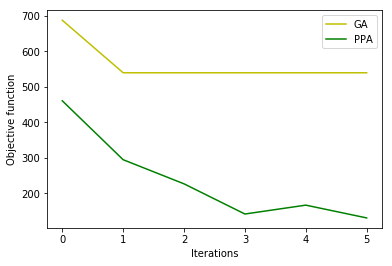

In [50]:
import matplotlib.pyplot as plt

plt.ylabel('Objective function')
plt.xlabel('Iterations')
plt.plot(GA1, 'y-',label ="GA")
plt.plot(PPA1, 'g-',label ="PPA")
plt.legend()
plt.show()

**Dataset 2**

In [32]:
Iteration=[1,5,10,20,30,50]

In [36]:
GA2=[518,385,385,385,385,385]

In [37]:
PPA2=[545,219,171,129,115,110]

In [51]:
import matplotlib.pyplot as plt

plt.ylabel('Objective function')
plt.xlabel('Iterations')
plt.plot(GA2, 'y-',label ="GA")
plt.plot(PPA2, 'g-',label ="PPA")
plt.legend()
plt.show()

**Dataset 3**

In [53]:
Iteration=[1,5,10,20,30,50]

In [54]:
GA3=[705,507,507,507,507,507]

In [55]:
PPA3=[488,270,232,191,140,140]

In [56]:
import matplotlib.pyplot as plt

plt.ylabel('Objective function')
plt.xlabel('Iterations')
plt.plot(GA3, 'y-',label ="GA")
plt.plot(PPA3, 'g-',label ="PPA")
plt.legend()
plt.show()